In [40]:
import torch
import torch.nn as nn        # Pytorch neural network package
import torch.optim as optim  # Pytorch optimization package
import torch.nn.functional as F
import numpy
import matplotlib.pyplot as plt

device = torch.device("cuda")

In [41]:
features = 16
# define a simple linear VAE #until now normal VAE without Beta
class LinearVAE(nn.Module):
    def __init__(self):
        super(LinearVAE, self).__init__()
 
        # encoder 84*84 = 7’056
        self.enc0 = nn.Linear(in_features=84*84, out_features=1024)
        self.enc1 = nn.Linear(in_features=1024, out_features=512)
        self.enc2 = nn.Linear(in_features=512, out_features=features*2)
 
        # decoder 
        self.dec0 = nn.Linear(in_features=features, out_features=512)
        self.dec1 = nn.Linear(in_features=512, out_features=1024)
        self.dec2 = nn.Linear(in_features=1024, out_features=84*84)

    def reparameterize(self, mu, log_var):
        """
        :param mu: mean from the encoder's latent space
        :param log_var: log variance from the encoder's latent space
        """
        std = torch.exp(0.5*log_var) # standard deviation
        eps = torch.randn_like(std) # `randn_like` as we need the same size
        sample = mu + (eps * std) # sampling as if coming from the input space
        return sample
 
    
    def encode(self, x):
        x = F.relu(self.enc0(x))
        x = F.relu(self.enc1(x))
        x = self.enc2(x)
        return x

In [47]:
#BVAE1 = LinearVAE()
BVAE10 = LinearVAE()
BVAE50= LinearVAE()
BVAE500 = LinearVAE()


BVAE1.load_state_dict(torch.load('C:/Users/erics/Documents/Programme/Bachelorarbeit/models/BVAE_Pong/B=1VAEMAR9'))
BVAE1.to(device)
BVAE10.load_state_dict(torch.load('C:/Users/erics/Documents/Programme/Bachelorarbeit/models/BVAE_Pong/B=10VAEMAR9'))
BVAE10.to(device)
BVAE50.load_state_dict(torch.load('C:/Users/erics/Documents/Programme/Bachelorarbeit/models/BVAE_Pong/B=50VAEMAR9'))
BVAE50.to(device)
BVAE500.load_state_dict(torch.load('C:/Users/erics/Documents/Programme/Bachelorarbeit/models/BVAE_Pong/B=500VAEMAR9'))
BVAE500.to(device)


LinearVAE(
  (enc0): Linear(in_features=7056, out_features=1024, bias=True)
  (enc1): Linear(in_features=1024, out_features=512, bias=True)
  (enc2): Linear(in_features=512, out_features=32, bias=True)
  (dec0): Linear(in_features=16, out_features=512, bias=True)
  (dec1): Linear(in_features=512, out_features=1024, bias=True)
  (dec2): Linear(in_features=1024, out_features=7056, bias=True)
)

In [43]:
train_data = numpy.load('train_data100kFEB23.npy')
val_data = numpy.load('val_data20kFEB23.npy')

In [44]:
print(train_data.shape)

(101848, 84, 84)


In [45]:
randomInput = torch.rand(256, 7056, device=device) #7056 = 84* 84
print(randomInput)


tensor([[0.1721, 0.7891, 0.3894,  ..., 0.1142, 0.8232, 0.3308],
        [0.5965, 0.6483, 0.9490,  ..., 0.1345, 0.2200, 0.6376],
        [0.3450, 0.5483, 0.8377,  ..., 0.4124, 0.1797, 0.5395],
        ...,
        [0.3227, 0.9852, 0.8660,  ..., 0.5077, 0.4905, 0.5927],
        [0.9267, 0.9623, 0.4165,  ..., 0.3979, 0.1943, 0.7825],
        [0.9726, 0.5351, 0.0238,  ..., 0.3163, 0.3479, 0.9363]],
       device='cuda:0')


In [48]:
enco1 = BVAE1.encode(randomInput)
enco10 = BVAE10.encode(randomInput)
enco50 = BVAE50.encode(randomInput)
enco500 = BVAE500.encode(randomInput)


print(enco10)
print(enco50)

tensor([[-0.7085,  0.5133, -0.0823,  ..., -2.7179, -7.1989, -1.4287],
        [ 0.3479,  1.5648, -0.0085,  ..., -2.9304, -7.7861, -1.6119],
        [-0.8241,  0.8573,  0.0869,  ..., -2.6799, -7.6718, -1.4130],
        ...,
        [ 0.9750,  1.5553, -0.1114,  ..., -2.7078, -7.9295, -1.4832],
        [ 0.2739,  0.7585,  0.1809,  ..., -2.8049, -7.7215, -1.5348],
        [ 1.3748,  0.3175,  0.7391,  ..., -2.9536, -7.7532, -1.6274]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[-4.5792e-01, -4.0121e-02,  3.5447e-02,  ..., -2.2419e-01,
         -4.7002e+00, -1.2410e-01],
        [ 6.3997e-01,  6.4804e-02, -3.4050e-03,  ..., -9.2936e-02,
         -5.1455e+00, -3.4508e-02],
        [-8.3715e-01,  4.2746e-02, -1.9819e-02,  ...,  3.6272e-03,
         -5.1913e+00,  3.7529e-03],
        ...,
        [ 1.5658e+00,  1.0882e-01, -2.4478e-02,  ..., -8.9430e-02,
         -5.2559e+00, -3.2314e-02],
        [ 4.0603e-01,  6.5943e-02, -2.9243e-02,  ..., -6.4504e-03,
         -5.1848e+00, -2

In [49]:
enco1 = enco1.detach().cpu().numpy()
enco10 = enco10.detach().cpu().numpy()
enco50 = enco50.detach().cpu().numpy()
enco500 = enco500.detach().cpu().numpy()

In [50]:
print(enco10.shape)

(256, 32)


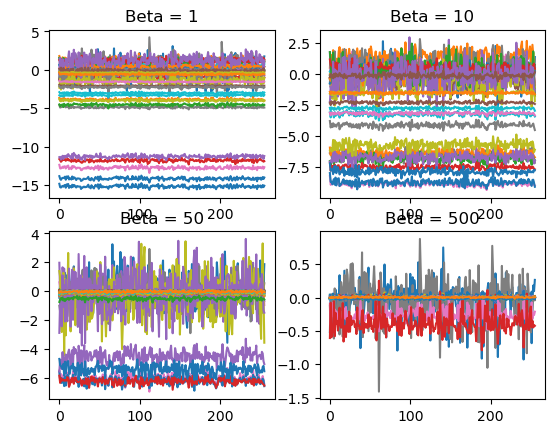

In [51]:
figure, axis = plt.subplots(2,2)

axis[0,0].plot(enco1)
axis[0,0].set_title( 'Beta = 1')
axis[0,1].plot(enco10)
axis[0,1].set_title( 'Beta = 10')
axis[1,0].plot(enco50)
axis[1,0].set_title( 'Beta = 50')
axis[1,1].plot(enco500)
axis[1,1].set_title( 'Beta = 500')

plt.show()

In [52]:
enco1 = numpy.mean(enco1, axis=0)
enco10 = numpy.mean(enco10, axis=0)
enco50 = numpy.mean(enco50, axis=0)
enco500 = numpy.mean(enco500, axis=0)

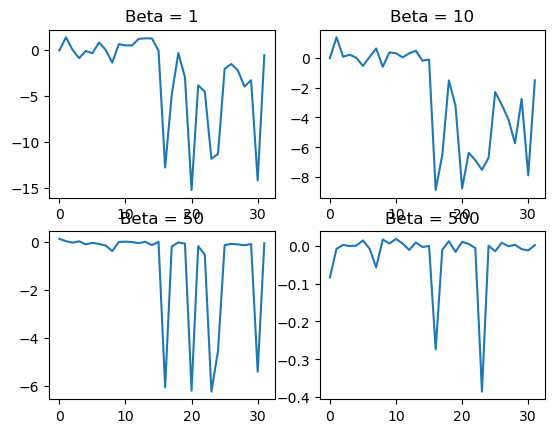

In [53]:
figure, axis = plt.subplots(2,2)

axis[0,0].plot(enco1)
axis[0,0].set_title( 'Beta = 1')
axis[0,1].plot(enco10)
axis[0,1].set_title( 'Beta = 10')
axis[1,0].plot(enco50)
axis[1,0].set_title( 'Beta = 50')
axis[1,1].plot(enco500)
axis[1,1].set_title( 'Beta = 500')


plt.show()

In [54]:
numZero1 = (numpy.histogram(enco1, bins=(-0.3, 0.3))[0])/2 #/2 da logvar & mean
numZero10 = (numpy.histogram(enco10, bins=(-0.3, 0.3))[0])/2 #/2 da logvar & mean
numZero50 = (numpy.histogram(enco50, bins=(-0.3, 0.3))[0])/2 #/2 da logvar & mean
numZero500 = (numpy.histogram(enco500, bins=(-0.3, 0.3))[0])/2 #/2 da logvar & mean

print("Beta = 1  " + str(numZero1))
print("Beta = 10  " + str(numZero10))
print("Beta = 50  " + str(numZero50))
print("Beta = 500  " + str(numZero500))

Beta = 1  [2.5]
Beta = 10  [5.]
Beta = 50  [12.5]
Beta = 500  [15.5]


In [55]:
Nonzero1 = 16-numZero1
Nonzero10 = 16-numZero10
Nonzero50 = 16-numZero50
Nonzero500 = 16-numZero500

print("Nonzero Dimensions Beta = 1  " + str(Nonzero1))
print("Nonzero Dimensions Beta = 10  " + str(Nonzero10))
print("Nonzero Dimensions Beta = 50  " + str(Nonzero50))
print("Nonzero Dimensions Beta = 500  " + str(Nonzero500))

Nonzero Dimensions Beta = 1  [13.5]
Nonzero Dimensions Beta = 10  [11.]
Nonzero Dimensions Beta = 50  [3.5]
Nonzero Dimensions Beta = 500  [0.5]
